Analysis of fixed cells imaged with the lattice light sheet
-----------------------------------------------------

The purpose of this notebook is to analyze the data produced by the previous notebook (`5.Lattice light sheet phalloidin (reconstruction)`). The aim is to produce the following analyses:

1. Extract relevant images in a reproducible way
2. Extract PSF close-ups at various compression ratios
3. Extract line profiles of the PSF close-ups at various compression ratios
4. Compute the MSE and SSIM as a function of the compression ratio

### About input data and formats
This notebook assumes that notebook `5.Lattice light sheet phalloidin (reconstruction)` was run for various compression ratios (using the cluster version). It also assumes that the individual images were recombined into a 16 bits TIFF image (using the included script `recombine.py` also included in `5.Lattice light sheet phalloidin (reconstruction)`. Then, it assumes that the recombined images were saved into `p_rec = "../../5_outputs/20170321_reconstructions_tiff/lattice_phalloidin/"`.

In [1]:
%matplotlib inline
import sys, os
import numpy as np
from libtiff import TIFF
import matplotlib.pyplot as plt

sys.path.append("../../3_code/")
import cstools

fig_p = "./figures/"
p_ref = "../../4_data/lattice-lightsheet/10182016_phal_cs/cell1/eyemat_200ms_20um_CamB_ch0_stack0000_1nm_0000000msec_0004907557msecAbs.tif" #### EDIT HERE!!!
p_rec = "../../5_outputs/20170321_reconstructions_tiff/lattice_phalloidin/"
p_prefix = "phalloidin"
p_suffix = "..tif"

cool_frames_z = [37, 80]
cool_frames = [132, 200] # There is a one position shift compare to ImageJ/Fiji viewer (ImageJ indexes images from 1)

In [6]:
l_mes = []
l_path = []
l_im = []

for i in [i for i in os.listdir(p_rec) if i.startswith(p_prefix) and i.endswith(p_suffix)]:
    p = os.path.join(p_rec, i)
    im = cstools.read_tif(p)
    
    l_mes.append(int(i[len(p_prefix):-len(p_suffix)]))
    l_path.append(p)
    l_im.append(im)

    print "Reconstruction {} loaded".format(i)
    
## Reorder
ord = sorted(range(len(l_mes)),key=l_mes.__getitem__)
l_mes = [l_mes[i] for i in ord]
l_path = [l_path[i] for i in ord]
l_im = [l_im[i] for i in ord]    

## Load reference
ref = cstools.read_tif(p_ref, div2=True)[:,:,::-1]

Reconstruction phalloidin10..tif loaded
Reconstruction phalloidin13..tif loaded
Reconstruction phalloidin2..tif loaded
Reconstruction phalloidin20..tif loaded
Reconstruction phalloidin25..tif loaded
Reconstruction phalloidin30..tif loaded
Reconstruction phalloidin40..tif loaded
Reconstruction phalloidin50..tif loaded


# 1. Extract images at various compression ratios

In [46]:
## First extract what we need for the paper
for ix in cool_frames:
    for i in range(len(l_mes)):
        c = l_mes[i]
        ii = l_im[i][ix,:,:]
        p = "5.lattice_phalloidin_x{}_c{}.png".format(ix,c)
        fp = os.path.join(fig_p, p)
        print "Saving: {}".format(fp)
        plt.imsave(fp, l_im[i][ix,:,:].T, cmap='gray')
    p = "5.lattice_phalloidin_x{}_c{}.png".format(ix,'ref')
    fp = os.path.join(fig_p, p)        
    plt.imsave(fp, ref[ix,:,:].T, cmap='gray')
    
## First extract what we need for the paper
for iz in cool_frames_z:
    for i in range(len(l_mes)):
        c = l_mes[i]
        ii = l_im[i][:,:,iz]
        p = "5.Z_lattice_phalloidin_x{}_c{}.png".format(iz,c)
        fp = os.path.join(fig_p, p)
        print "Saving: {}".format(fp)
        plt.imsave(fp, l_im[i][:,:,iz].T, cmap='gray')
    p = "5.Z_lattice_phalloidin_x{}_c{}.png".format(iz,'ref')
    fp = os.path.join(fig_p, p)        
    plt.imsave(fp, ref[:,:,iz].T, cmap='gray')    

Saving: ./figures/5.lattice_phalloidin_x132_c2.png
Saving: ./figures/5.lattice_phalloidin_x132_c10.png
Saving: ./figures/5.lattice_phalloidin_x132_c13.png
Saving: ./figures/5.lattice_phalloidin_x132_c20.png
Saving: ./figures/5.lattice_phalloidin_x132_c25.png
Saving: ./figures/5.lattice_phalloidin_x132_c30.png
Saving: ./figures/5.lattice_phalloidin_x132_c40.png
Saving: ./figures/5.lattice_phalloidin_x132_c50.png
Saving: ./figures/5.lattice_phalloidin_x200_c2.png
Saving: ./figures/5.lattice_phalloidin_x200_c10.png
Saving: ./figures/5.lattice_phalloidin_x200_c13.png
Saving: ./figures/5.lattice_phalloidin_x200_c20.png
Saving: ./figures/5.lattice_phalloidin_x200_c25.png
Saving: ./figures/5.lattice_phalloidin_x200_c30.png
Saving: ./figures/5.lattice_phalloidin_x200_c40.png
Saving: ./figures/5.lattice_phalloidin_x200_c50.png
Saving: ./figures/5.Z_lattice_phalloidin_x37_c2.png
Saving: ./figures/5.Z_lattice_phalloidin_x37_c10.png
Saving: ./figures/5.Z_lattice_phalloidin_x37_c13.png
Saving: ./fi

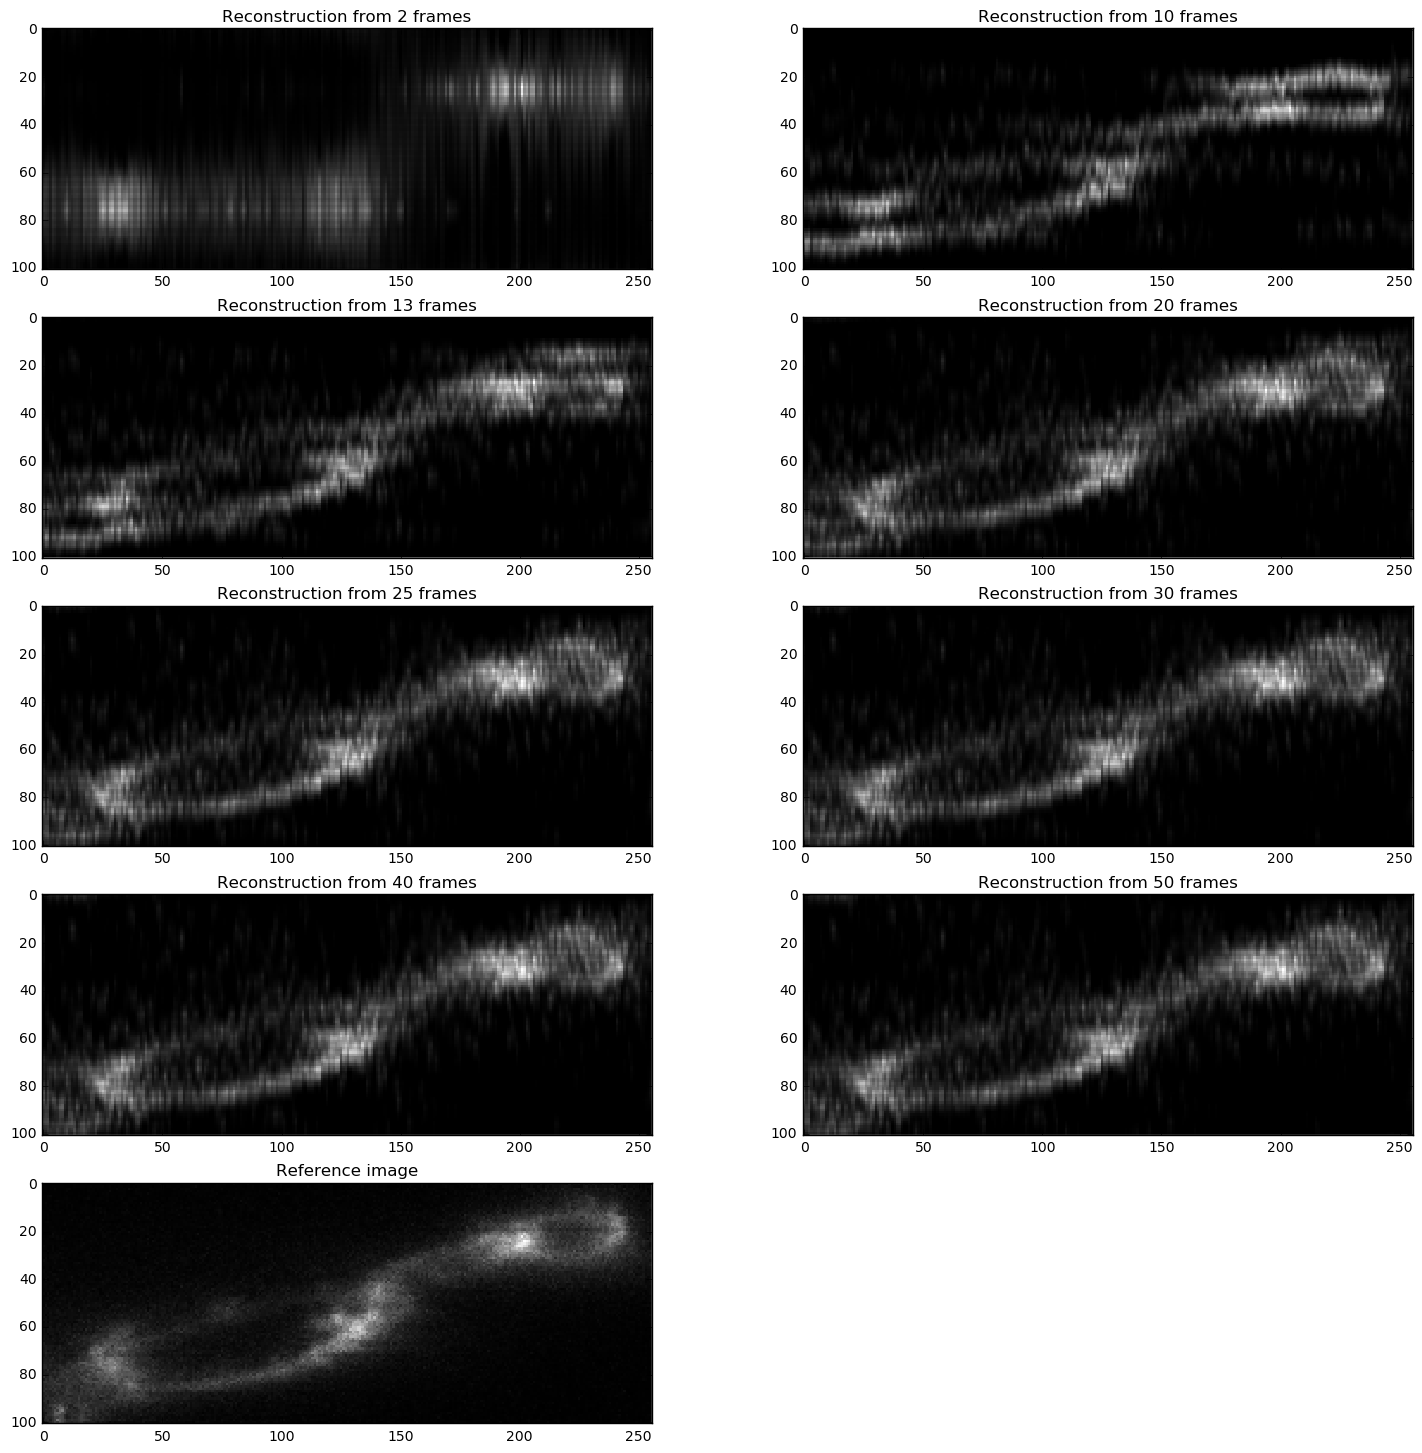

In [15]:
ix = cool_frames[0] #iy=254

plt.figure(figsize=(18, 2*(len(l_mes)+1)))

for (i,idx) in enumerate(l_mes):
    plt.subplot(int(len(l_mes))/2+1, 2, i+1)
    plt.imshow(l_im[i][ix,:,:].T, cmap='gray', interpolation='none')
    plt.title("Reconstruction from {} frames".format(idx))
plt.subplot(int(len(l_mes))/2+1, 2, len(l_mes)+1)
plt.imshow(ref[ix,:,:].T, cmap='gray', interpolation='none')
plt.title("Reference image")

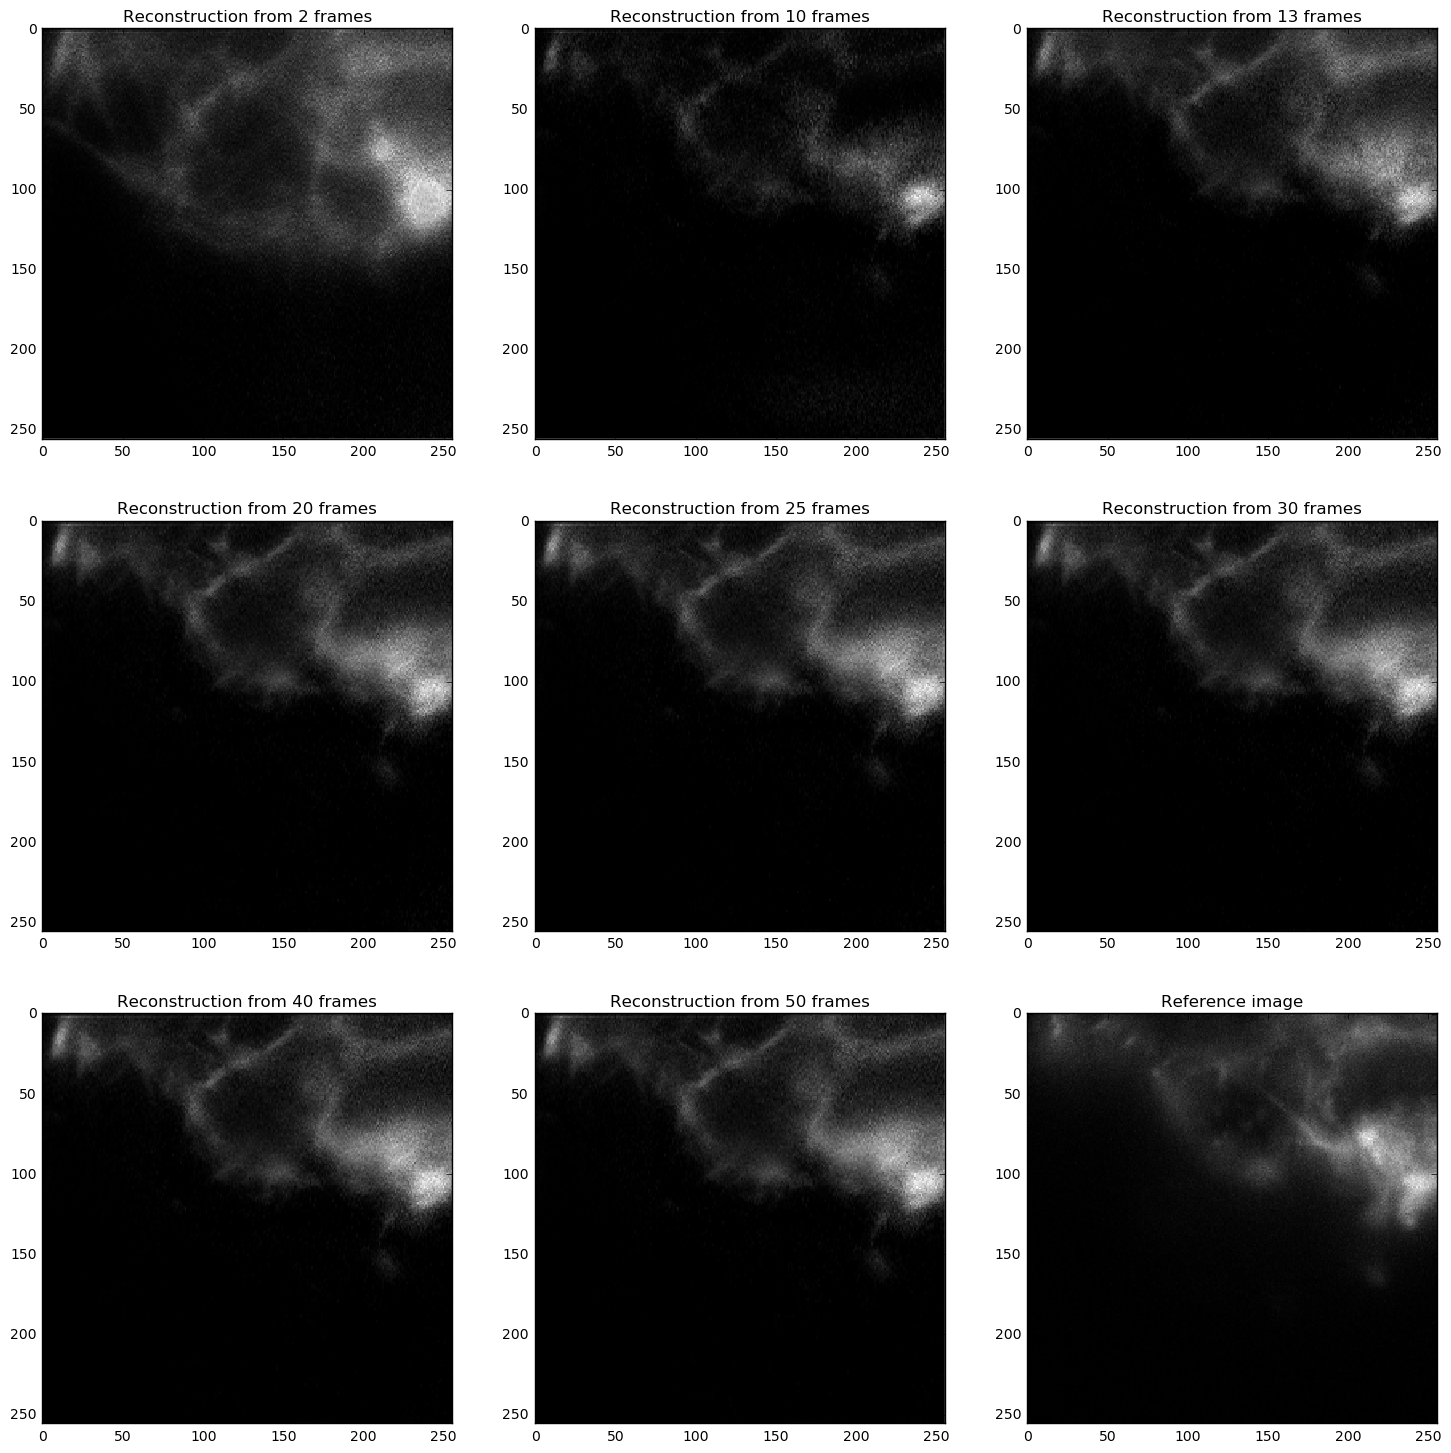

In [20]:
iz = cool_frames_z[1] #iy=254

plt.figure(figsize=(18, 2*(len(l_mes)+1)))

for (i,idx) in enumerate(l_mes):
    plt.subplot(int(len(l_mes))/3+1, 3, i+1)
    plt.imshow(l_im[i][:,:,iz].T, cmap='gray', interpolation='none')
    plt.title("Reconstruction from {} frames".format(idx))
plt.subplot(int(len(l_mes))/3+1, 3, len(l_mes)+1)
plt.imshow(ref[:,:,iz].T, cmap='gray', interpolation='none')
plt.title("Reference image")

# 2. Extract PSF close-ups and line profiles

Here the idea is to take two PSFs and see what happens when we degrade the compression ratio. The idea is also to compute line profiles in the $x$ and $z$ dimensions to get an idea of how things work.

In [136]:
def clr(i, cmap='viridis'):
    """Returns a viridis color"""
    cm = plt.cm.get_cmap(cmap)
    return cm(i)

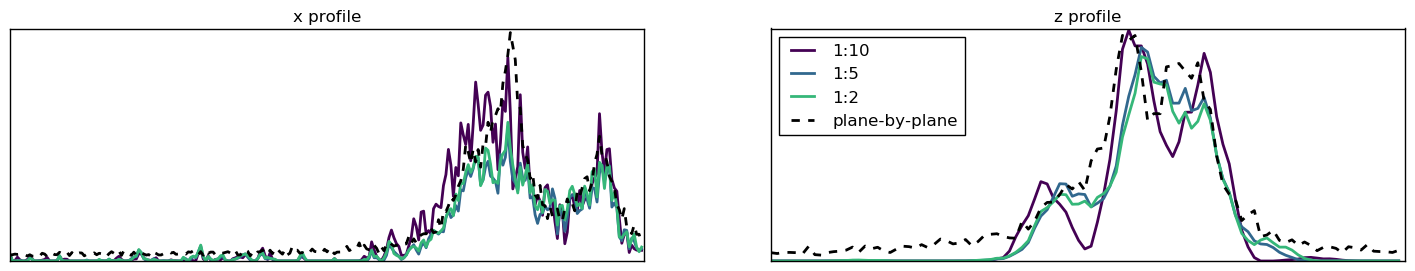

In [144]:
pos_x = [25]
pos_z = [125]

ss_comp = [int(101/l_mes[i]) for i in ss]

plt.figure(figsize=(18,3))
for i in range(len(pos_x)):
    plt.subplot(len(pos_x), 2, i+1)
    #yref =ref[tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[(pos_x[i]-1):(pos_x[i]+1),:].mean(0)
    #plt.plot(np.arange(yref.shape[0])+shift, yref, '--', linewidth=3, color='black', label="reference")
    for (k,j) in enumerate(ss):
        #y = l_im[j][tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[(pos_x[i]-1):(pos_x[i]+1),:].mean(0)
        y = l_im[j][cool_frames[0], :, (pos_x[i]-1):(pos_x[i]+1)].mean(1)
        plt.plot(y, color=clr(float(k)/len(ss)), linewidth=2, label="1:{}".format(ss_comp[k]))
    plt.plot(ref[cool_frames[0], :, (pos_x[i]-1):(pos_x[i]+1)].mean(1)/4, '--', linewidth=2, color='black', label="plane-by-plane")
    plt.title("x profile")
    plt.xlim(0,ref.shape[0])
plt.xticks([]);plt.yticks([])
    
for i in range(len(pos_x)):
    plt.subplot(len(pos_x), 2, 1+i+1)
    #yref =ref[tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[(pos_x[i]-1):(pos_x[i]+1),:].mean(0)
    #plt.plot(np.arange(yref.shape[0])+shift, yref, '--', linewidth=3, color='black', label="reference")
    for (k,j) in enumerate(ss):
        #y = l_im[j][tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[(pos_x[i]-1):(pos_x[i]+1),:].mean(0)
        y = l_im[j][cool_frames[0], (pos_z[i]-1):(pos_z[i]+1), :].mean(0)
        plt.plot(y, color=clr(float(k)/len(ss)), linewidth=2, label="1:{}".format(ss_comp[k]))
    plt.plot(ref[cool_frames[0], (pos_z[i]-1):(pos_z[i]+1), :].mean(0)/4, '--', linewidth=2, color='black', label="plane-by-plane")    
    plt.title("z profile")
    plt.xlim(0,ref.shape[2])
plt.xticks([]);plt.yticks([])
plt.legend(loc='upper left')
plt.savefig("figures/5.profiles.pdf")

In [ ]:
## Plot across z axis
shift = 0
pos_x = [45]
pos_z = [20]
ss = [1,4,7,11]

plt.figure(figsize=(18,8))
for i in range(len(pos_x)):
    plt.subplot(len(pos_x), 2, i+1)
    tcu = cu[i]
    yref =ref[tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[(pos_x[i]-1):(pos_x[i]+1),:].mean(0)
    plt.plot(np.arange(yref.shape[0])+shift, yref, '--', linewidth=3, color='black', label="reference")
    for (k,j) in enumerate(ss):
        y = l_im[j][tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[(pos_x[i]-1):(pos_x[i]+1),:].mean(0)
        plt.plot(y, color="{}".format(.9-float(k)/len(ss)), label="{} frames".format(l_mes[j]))
    plt.title("x profile")
    
for i in range(len(pos_x)):
    plt.subplot(len(pos_x), 2, 1+i+1)
    tcu = cu[i]
    yref = ref[tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[:,(pos_z[i]-1):(pos_z[i]+1)].mean(1)
    plt.plot(yref, '--', linewidth=3, color="black", label="reference")
    for (k,j) in enumerate(ss):
        y = l_im[j][tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[:,(pos_z[i]-1):(pos_z[i]+1)].mean(1)
        plt.plot(y, color="{}".format(.9-float(k)/len(ss)), label="{} frames".format(l_mes[j]))
    
    plt.title("z profile")
plt.legend()
plt.savefig("figures/4.profiles.pdf")

# 3. Compute MSE/SSIM as a function of the compression ratio

In [21]:
## Load indicators
from skimage.measure import structural_similarity as ssim
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    # There is a bijection between PSNR and MSE: PSNR = 10*log(255*255/MSE) / log(10)
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [22]:
## Compute MSE, using the reconstruction with the lower compression reconstruction as a reference (the eye is too noisy)
## This code could be paralellized.

idx = l_im[-1].max(axis=(1,2))>0 ## Filter for higher intensity frames
l_imhigh = [im[idx,:,:] for im in l_im]


MSE = np.zeros((l_imhigh[0].shape[0],len(l_mes)))
SSIM = np.zeros((l_imhigh[0].shape[0],len(l_mes)))

for j in range(l_imhigh[0].shape[0]):
    if (j+1)%20 == 0:
        print "computing plane {}/{}".format(j+1, l_imhigh[0].shape[0])
    MSE[j,:] = [mse(l_imhigh[-1][j,:,:], l_imhigh[i][j,:,:]) for i in range(len(l_mes))]
    SSIM[j,:] = [ssim(l_imhigh[-1][j,:,:], l_imhigh[i][j,:,:]) for i in range(len(l_mes))]

/usr/local/lib/python2.7/dist-packages/skimage/util/shape.py:237: RuntimeWarning: Cannot provide views on a non-contiguous input array without copying.
  warn(RuntimeWarning("Cannot provide views on a non-contiguous input "


computing plane 20/256
computing plane 40/256
computing plane 60/256
computing plane 80/256
computing plane 100/256
computing plane 120/256
computing plane 140/256
computing plane 160/256
computing plane 180/256
computing plane 200/256
computing plane 220/256
computing plane 240/256


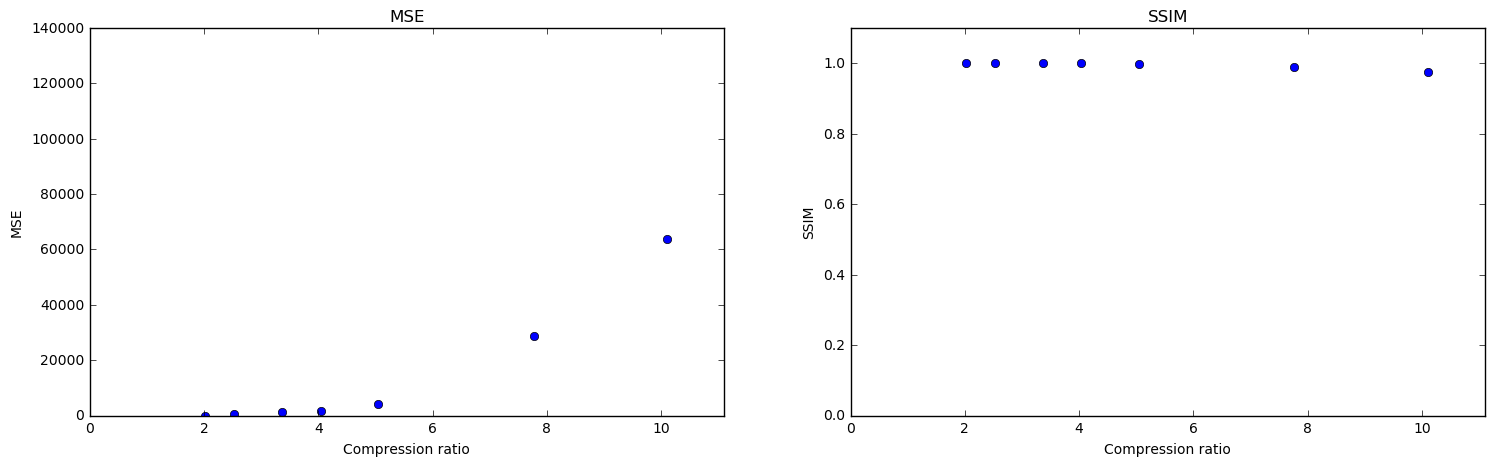

In [33]:
c_ratio = 101./np.array(l_mes) # Compression ratio

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(c_ratio, MSE.mean(0), 'o')
#plt.errorbar(c_ratio, MSE.mean(0), yerr=MSE.std(0))
plt.xlabel('Compression ratio')
plt.ylabel('MSE')
plt.xlim(0,max(c_ratio[1:])+1)
plt.title("MSE")

plt.subplot(122)
plt.plot(c_ratio, SSIM.mean(0), 'o')
#plt.errorbar(c_ratio, SSIM.mean(0), yerr=SSIM.std(0))
plt.xlim(0,max(c_ratio[1:])+1)
plt.ylim(0,1.1)
plt.xlabel('Compression ratio')
plt.ylabel('SSIM')
plt.title("SSIM")

# 4. Compute the frequency content of the image

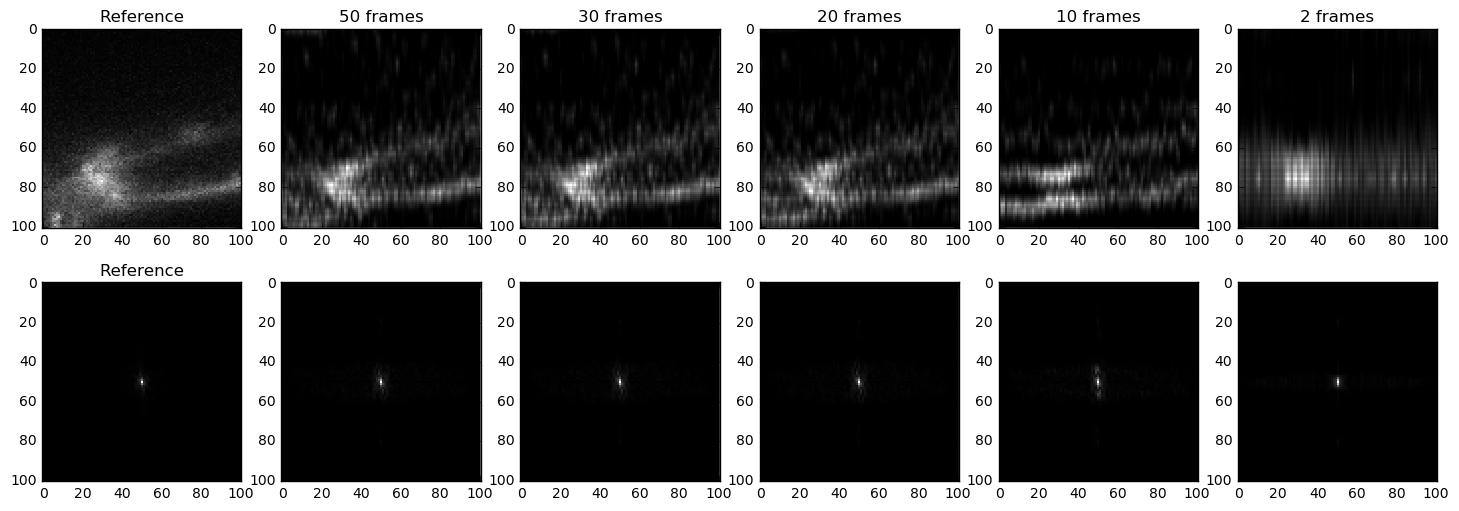

In [44]:
## From http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#fourier-transform-in-numpy
def get_fft(img, power=False):
    """Returns the FFT of a 2D image"""
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    if power:
        magnitude_spectrum = 20*np.log(np.abs(fshift)) 
    else:
        magnitude_spectrum = np.abs(fshift)
    return magnitude_spectrum

ss = [0,1,3,5,7]
cf = cool_frames[0]
pos_z = [0,101]
pos_x = [0,  101]

plt.figure(figsize=(18,6))
power = False
img=ref
plt.subplot(2, len(ss)+1,  1)
plt.imshow(img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T, interpolation='none', cmap = 'gray')
plt.title("Reference")
plt.subplot(2, len(ss)+1, len(ss)+1+1)
yref = img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T
ff=get_fft(yref, power)
plt.imshow(ff, cmap = 'gray', interpolation='none', vmin=0, vmax=ff.max())
#plt.colorbar(orientation='horizontal', shrink=.8)
plt.title("Reference")

for (i,j) in enumerate(ss[::-1]):
    img=l_im[j]
    plt.subplot(2, len(ss)+1, i+2)
    plt.imshow(img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T, interpolation='none', cmap = 'gray')
    plt.title("{} frames".format(l_mes[j]))
    plt.subplot(2, len(ss)+1, len(ss)+1+i+2)
    plt.imshow(get_fft(img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T, power), cmap = 'gray', interpolation='none')#, vmin=0, vmax=ff.max())
    #plt.title("{} frames".format(l_mes[j]))
    #plt.colorbar(orientation='horizontal', shrink=.8)
plt.savefig("./figures/5.FFTanalysis.png", dpi=300)

## 5. Display mean intensity projections along the $z$ and $x$ axis

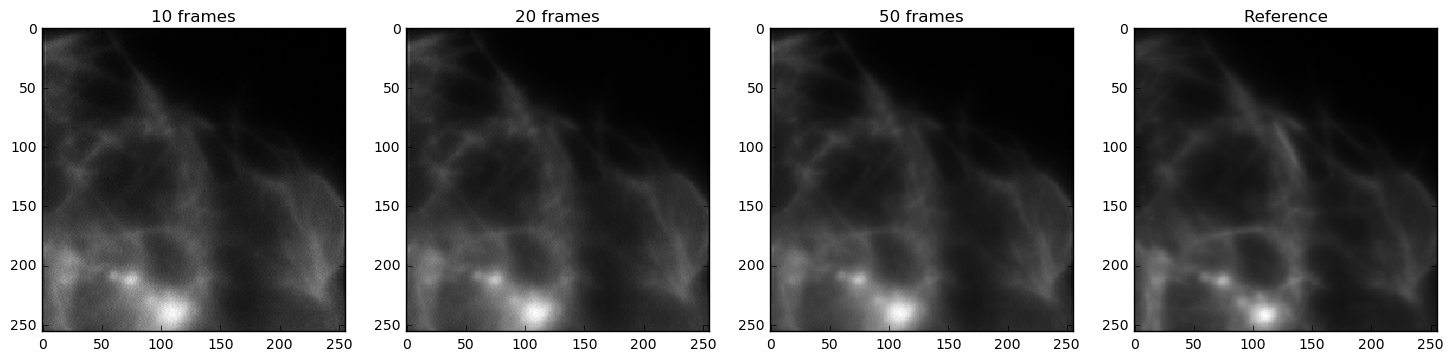

In [128]:
## z dimension
ss = [1,3,7]

plt.figure(figsize=(18,6))
for (i,j) in enumerate(ss):
    plt.subplot(1,4,i+1)
    plt.imshow(l_im[j].mean(2), cmap='gray', interpolation='none')
    plt.title("{} frames".format(l_mes[j]))
plt.subplot(1,4,2*2)
plt.imshow(ref.mean(2), cmap='gray', interpolation='none')
plt.title('Reference')

plt.savefig('5.mean_intensity_xy.png', dpi=300)

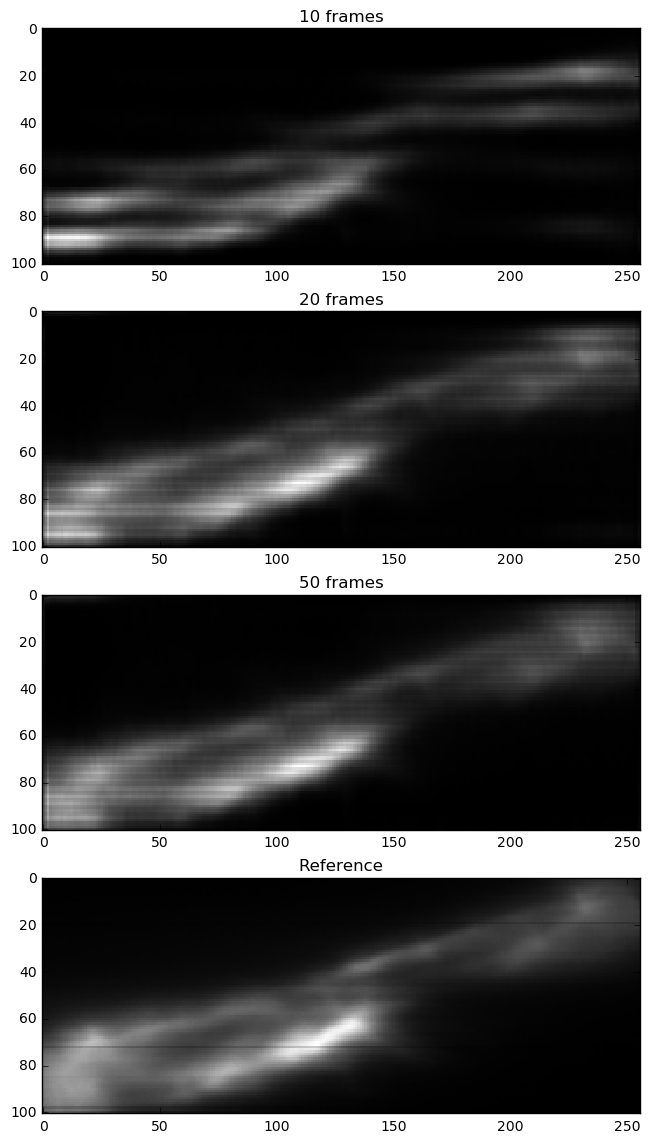

In [129]:
## x dimension

plt.figure(figsize=(10,14))
for (i,j) in enumerate(ss):
    plt.subplot(4,1,i+1)
    plt.imshow(l_im[j].mean(0).T, cmap='gray', interpolation='none')
    plt.title("{} frames".format(l_mes[j]))
plt.subplot(4,1,2*2)
plt.imshow(ref.mean(0).T, cmap='gray', interpolation='none')
plt.title('Reference')

plt.savefig('5.mean_intensity_xz.png', dpi=300)

## 5. Display max intensity projections along the $z$ and $x$ axis

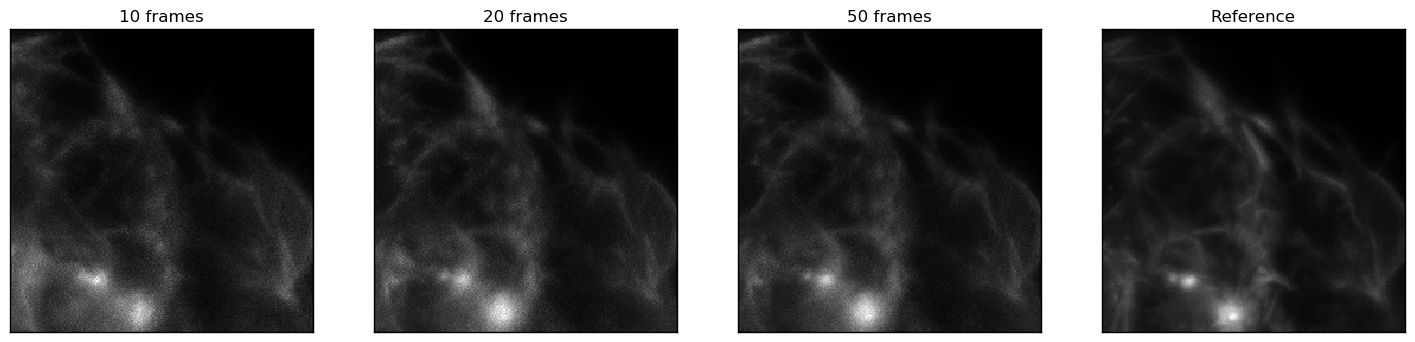

In [130]:
## z dimension

plt.figure(figsize=(18,6))
for (i,j) in enumerate(ss):
    plt.subplot(1,4,i+1)
    plt.imshow(l_im[j].max(2), cmap='gray', interpolation='none')
    plt.title("{} frames".format(l_mes[j]))
    plt.imsave("5.max_xy_{}frames.png".format(l_mes[j]), l_im[j].max(2), cmap='gray')
    plt.yticks([]);plt.xticks([])
plt.subplot(1,4,2*2)
plt.imshow(ref.max(2), cmap='gray', interpolation='none')
plt.imsave("5.max_xy_{}frames.png".format("reference"), ref.max(2), cmap='gray')
plt.title('Reference')
plt.yticks([]);plt.xticks([])

plt.savefig('5.max_intensity_xy.png', dpi=300)

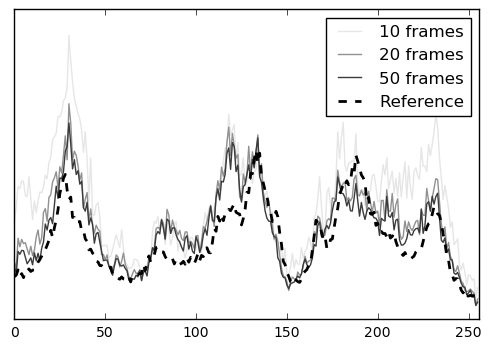

In [131]:
for (i,j) in enumerate(ss):
    plt.plot(l_im[j].max(2)[124:127,:].mean(0)*5, label="{} frames".format(l_mes[j]), color="{}".format(.9-float(i)/len(ss)))
plt.plot(ref.max(2)[124:127,:].mean(0), '--', label="Reference", linewidth=2, color='black')
plt.legend()
plt.yticks([])
plt.xlim(0,ref.shape[1])

plt.savefig("5.max_profile_xy.pdf")

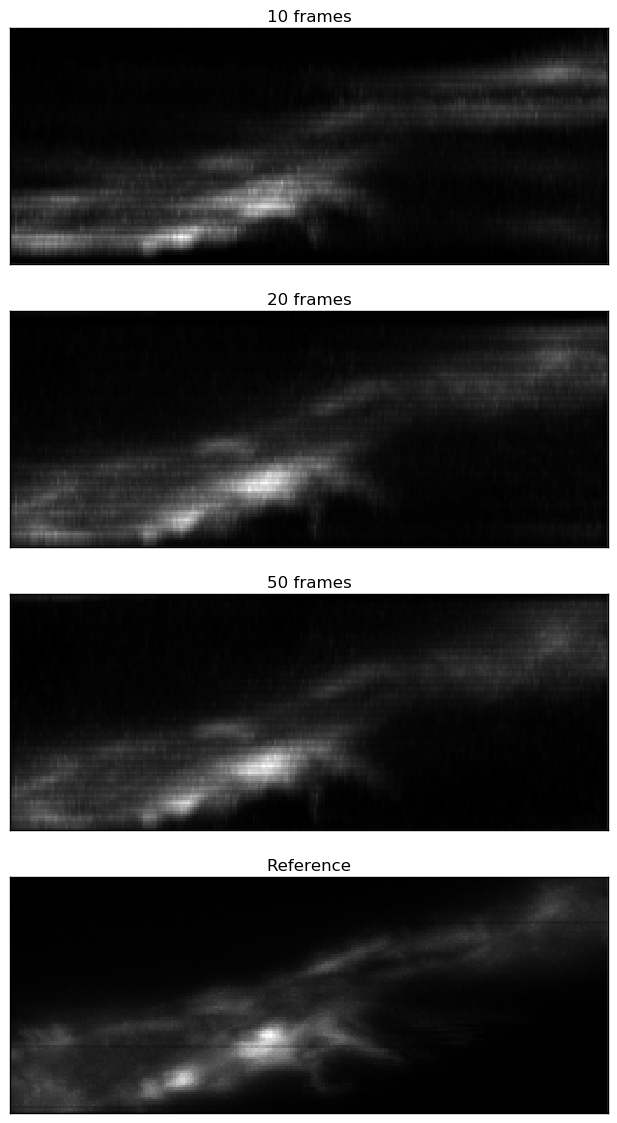

In [132]:
## x dimension

plt.figure(figsize=(10,14))
for (i,j) in enumerate(ss):
    plt.subplot(4,1,i+1)
    plt.imshow(l_im[j].max(0).T, cmap='gray', interpolation='none')
    plt.imsave("5.max_xz_{}frames.png".format(l_mes[j]), l_im[j].max(0).T, cmap='gray')
    plt.title("{} frames".format(l_mes[j]))
    plt.yticks([]);plt.xticks([])
plt.subplot(4,1,2*2)
plt.imshow(ref.max(0).T, cmap='gray', interpolation='none')
plt.imsave("5.max_xz_{}frames.png".format("reference"), ref.max(0).T, cmap='gray')
plt.yticks([]);plt.xticks([])
plt.title('Reference')

plt.savefig('5.max_intensity_xz.png', dpi=300)

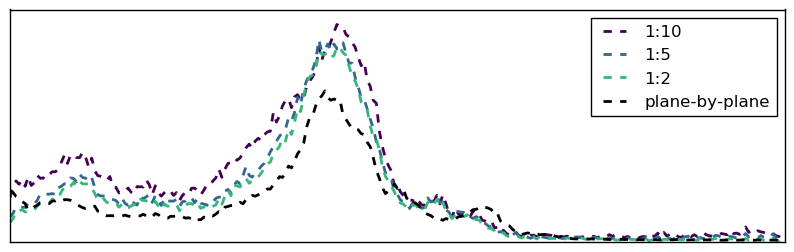

In [151]:
ss_comp = [int(101/l_mes[i]) for i in ss]

plt.figure(figsize=(10,3))

for (i,j) in enumerate(ss):
    plt.plot(l_im[j].max(0)[:,74:77].mean(1)*5, '--', label="1:{}".format(ss_comp[i]), color=clr(float(i)/len(ss)), linewidth=2, )
plt.plot(ref.max(0)[:,74:77].mean(1), '--', label="plane-by-plane", linewidth=2, color='black')
plt.legend()
plt.xlim(0,ref.shape[0])
plt.yticks([]);plt.xticks([])

plt.savefig("5.max_profile_xz.pdf")